# Import Dependecies

In [4]:
import os
import numpy as np
from cv2 import imread, resize, IMREAD_GRAYSCALE
import cv2
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import models, layers, regularizers, optimizers, callbacks
from sklearn.model_selection import train_test_split

In [103]:
train_data = './leapGestRecog'
for fold in os.listdir(train_data):
    print(os.path.join(train_data, fold))

./leapGestRecog\00
./leapGestRecog\01
./leapGestRecog\02
./leapGestRecog\03
./leapGestRecog\04
./leapGestRecog\05
./leapGestRecog\06
./leapGestRecog\07
./leapGestRecog\08
./leapGestRecog\09


In [104]:
for folder in os.listdir(train_data):
    subfold = os.path.join(train_data, folder)
    for subfolder in os.listdir(subfold):
        print(os.path.join(subfold, subfolder))
    print('-----------------------------------')

./leapGestRecog\00\01_l
./leapGestRecog\00\02_thumb
./leapGestRecog\00\03_index
./leapGestRecog\00\04_ok
./leapGestRecog\00\05_c
-----------------------------------
./leapGestRecog\01\01_l
./leapGestRecog\01\02_thumb
./leapGestRecog\01\03_index
./leapGestRecog\01\04_ok
./leapGestRecog\01\05_c
-----------------------------------
./leapGestRecog\02\01_l
./leapGestRecog\02\02_thumb
./leapGestRecog\02\03_index
./leapGestRecog\02\04_ok
./leapGestRecog\02\05_c
-----------------------------------
./leapGestRecog\03\01_l
./leapGestRecog\03\02_thumb
./leapGestRecog\03\03_index
./leapGestRecog\03\04_ok
./leapGestRecog\03\05_c
-----------------------------------
./leapGestRecog\04\01_l
./leapGestRecog\04\02_thumb
./leapGestRecog\04\03_index
./leapGestRecog\04\04_ok
./leapGestRecog\04\05_c
-----------------------------------
./leapGestRecog\05\01_l
./leapGestRecog\05\02_thumb
./leapGestRecog\05\03_index
./leapGestRecog\05\04_ok
./leapGestRecog\05\05_c
-----------------------------------
./leapGest

In [105]:
os.makedirs('all_images', exist_ok=True)

In [106]:
classes = ['01_l', '02_thumb', '03_index', '04_ok', '05_c']

root = Path('./all_images')
for cls in classes:
    (root / cls).mkdir(parents=True, exist_ok=True)


In [5]:
src_roots = [
    Path('./leapGestRecog/00'),
    Path('./leapGestRecog/01'),
    Path('./leapGestRecog/02'),
    Path('./leapGestRecog/03'),
    Path('./leapGestRecog/04'),
    Path('./leapGestRecog/05'),
    Path('./leapGestRecog/06'),
    Path('./leapGestRecog/07'),
    Path('./leapGestRecog/08'),
    Path('./leapGestRecog/09'),
]
dst_root = Path('./all_images')
subfolders = ['01_l', '02_thumb', '03_index', '04_ok', '05_c']

img_suffixes = {'.png'}

for sub in subfolders:
    dst_dir = dst_root / sub
    dst_dir.mkdir(parents=True, exist_ok=True)

    for src_root in src_roots:
        src_dir = src_root / sub
        if not src_dir.exists():
            print(f'Not exist: {src_dir}')
            continue
        for file in src_dir.iterdir():
            if img_suffixes and file.suffix.lower() not in img_suffixes:
                continue

            dst_path = dst_dir / file.name

            if dst_dir.exists():
                prefix = f"{src_root.name}_"
                dst_path = dst_dir / f"{prefix}{file.name}"
            shutil.copy2(file, dst_path)
            # print(f'{file} to {dst_path}')


In [108]:
print(train_data)

./leapGestRecog


In [109]:
train_data = './all_images'

In [110]:
categories = classes
print(categories)
folds = [str(train_data + '/' + category) for category in categories]
print(folds)

['01_l', '02_thumb', '03_index', '04_ok', '05_c']
['./all_images/01_l', './all_images/02_thumb', './all_images/03_index', './all_images/04_ok', './all_images/05_c']


In [111]:
for f in folds:
    print(f.split('/')[2], ' : ', len(os.listdir(f)))

01_l  :  2000
02_thumb  :  2000
03_index  :  2000
04_ok  :  2000
05_c  :  2000


In [112]:
x = 0
for img in os.listdir(folds[0]):
    x += 1
    img_array = imread(os.path.join(folds[0], img))
    print(img_array)
    print(img_array.shape)
    if x == 1:
        break

[[[ 5  5  5]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 4  4  4]
  [ 5  5  5]
  [ 4  4  4]
  ...
  [ 4  4  4]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 6  6  6]
  [ 5  5  5]
  [ 5  5  5]
  ...
  [ 4  4  4]
  [ 3  3  3]
  [ 3  3  3]]

 ...

 [[ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]
  ...
  [ 6  6  6]
  [ 4  4  4]
  [ 5  5  5]]

 [[ 5  5  5]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 3  3  3]
  [ 5  5  5]
  [ 5  5  5]]

 [[ 5  5  5]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [25 25 25]
  [12 12 12]
  [16 16 16]]]
(240, 640, 3)


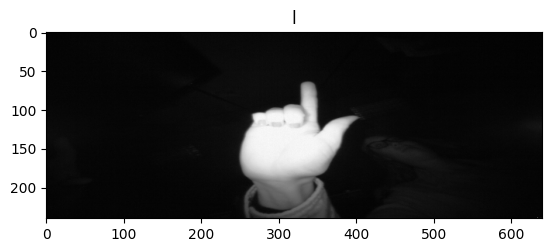

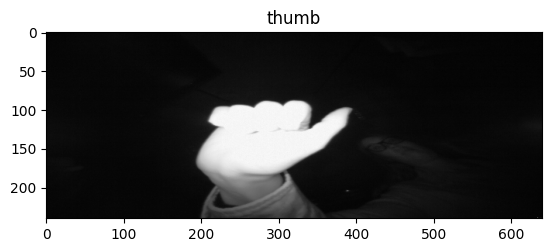

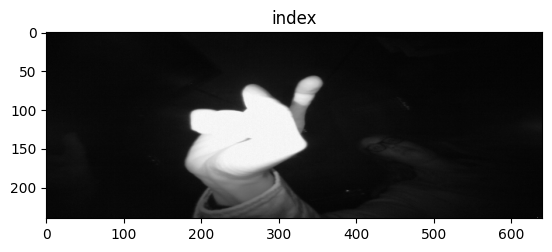

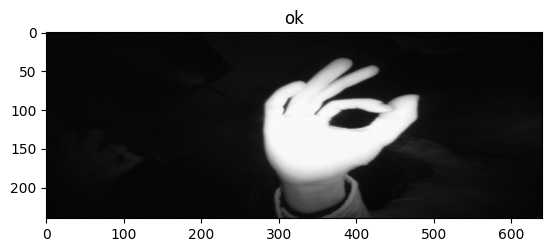

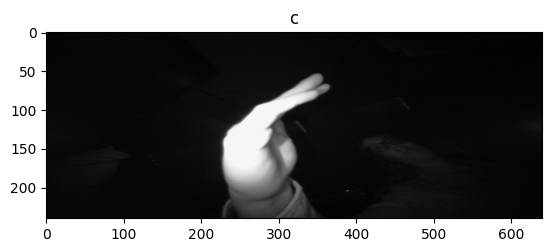

In [113]:
for fold in folds:
    x = 0
    for img in os.listdir(fold):
        x += 1
        img_array = imread(os.path.join(fold, img))
        plt.imshow(img_array, cmap='gray')
        plt.title((fold.split('/')[2]).split('_')[1])
        plt.show()
        if x == 1:
            break

# Resizing the data and save it to train it

In [139]:
training_data = []

def create_training_data(width, height):
    for fold in folds:
        class_num = folds.index(fold)
        for img in tqdm(os.listdir(fold)):
            img_array = imread(os.path.join(fold, img))
            img_array_resize = resize(img_array, (width, height))
            training_data.append([img_array_resize, class_num])
        
create_training_data(100, 100)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:07<00:00, 268.46it/s]


In [140]:
random.shuffle(training_data)

In [151]:
x = []
y = []

for label, fold in enumerate(folds):
    for img_name in tqdm(os.listdir(fold)):
        img_path = os.path.join(fold, img_name)
        img = imread(img_path, IMREAD_GRAYSCALE)
        img = resize(img, (100, 100))
        x.append(img)
        y.append(label)

100%|██████████| 2000/2000 [00:09<00:00, 210.92it/s]


In [152]:
print(len(training_data))
print(len(x))
print(len(y))

10000
10000
10000


In [153]:
x[:1]

[array([[4, 5, 5, ..., 3, 5, 4],
        [4, 5, 4, ..., 4, 4, 4],
        [4, 5, 5, ..., 2, 3, 3],
        ...,
        [5, 6, 5, ..., 5, 5, 5],
        [6, 4, 5, ..., 3, 6, 5],
        [5, 4, 4, ..., 4, 5, 4]], shape=(100, 100), dtype=uint8)]

In [154]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [155]:
x = np.array(x).reshape(-1, 100, 100, 1)
y = np.array(y)

In [156]:
x = x.astype('float32') / 255.0 # Neural networks learn better with smaller, normalized input values.


In [157]:
x[:1]

array([[[[0.01568628],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01176471],
         [0.01960784],
         [0.01568628]],

        [[0.01568628],
         [0.01960784],
         [0.01568628],
         ...,
         [0.01568628],
         [0.01568628],
         [0.01568628]],

        [[0.01568628],
         [0.01960784],
         [0.01960784],
         ...,
         [0.00784314],
         [0.01176471],
         [0.01176471]],

        ...,

        [[0.01960784],
         [0.02352941],
         [0.01960784],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]],

        [[0.02352941],
         [0.01568628],
         [0.01960784],
         ...,
         [0.01176471],
         [0.02352941],
         [0.01960784]],

        [[0.01960784],
         [0.01568628],
         [0.01568628],
         ...,
         [0.01568628],
         [0.01960784],
         [0.01568628]]]], shape=(1, 100, 100, 1), dtype=float32)

# Spliting the data

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=1234)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 100, 100, 1)
(2000, 100, 100, 1)
(8000,)
(2000,)


# Building a CNN model

In [159]:
model = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'VALID', input_shape = (100, 100, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding = 'VALID', input_shape = (100, 100, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(5, activation = 'softmax')

])

c:\Users\ADM\Documents\projects\PRODIGY TASKS\PRODIGY_ML_04\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [161]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 49, 49, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,773 (878.02 KB)

 Trainable params: 224,581 (877.27 KB)

 Non-trainable params: 192 (768.00 B)

# Training the Model

In [163]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience = 5,
    restore_best_weights=True,
)

history = model.fit(
    x_train, y_train,
    batch_size=65,
    epochs= 50,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.3635 - loss: 3.7183 - val_accuracy: 0.2150 - val_loss: 3.6937
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.5047 - loss: 3.2167 - val_accuracy: 0.2313 - val_loss: 3.4537
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.6232 - loss: 2.7969 - val_accuracy: 0.5300 - val_loss: 3.0585
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.7122 - loss: 2.4501 - val_accuracy: 0.8475 - val_loss: 2.4927
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.7792 - loss: 2.1671 - val_accuracy: 0.9438 - val_loss: 1.9691
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.8299 - loss: 1.9190 - val_accuracy: 0.9750 - val_loss: 1.6131
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.8697 - loss: 1.7155 - val_accuracy: 0.9887 - val_loss: 1.4133
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.9022 - loss: 1

# Model Evaluation

In [164]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9985 - loss: 0.3355
Test Loss: 0.3355
Test Accuracy: 0.9985


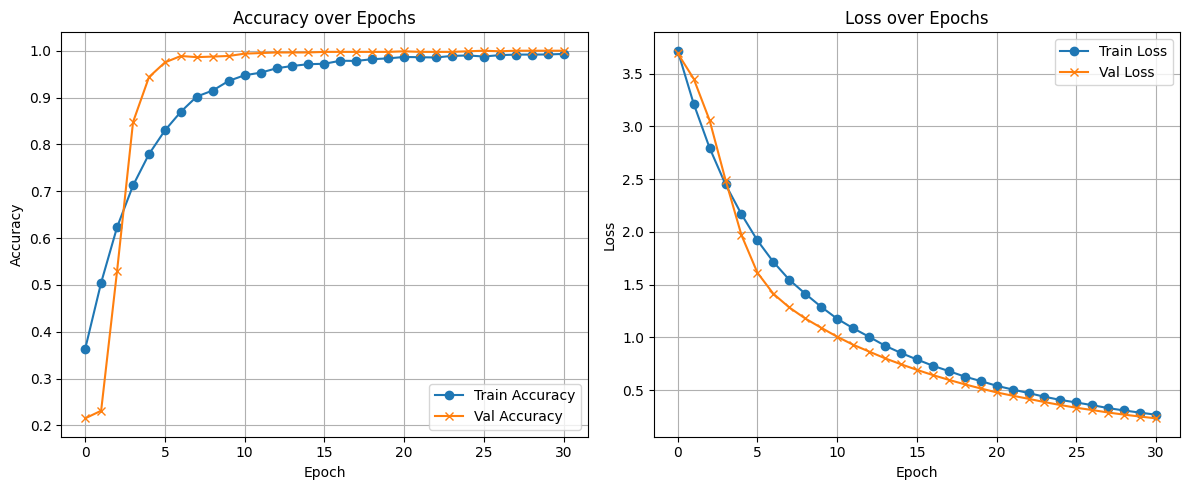

In [165]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [166]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = y_test

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


<Figure size 1200x600 with 0 Axes>

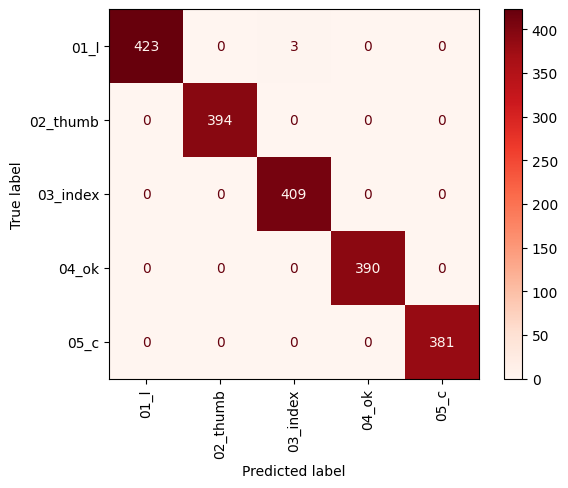

In [174]:
plt.figure(figsize = (12, 6))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = categories)
disp.plot(xticks_rotation = 'vertical', cmap = 'Reds')
plt.show()